In [1]:
import astropy.io.fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, Column

### This notebook is intended just to have you practice some dictionary skills and basic plotting! 

In [2]:
#replace the catalog path here with the path to your local path
path = '/Users/minathoresen/Desktop/JPL_summer_research/CH2O_CMZoom/'

### this is where you actually load in the catalog table
catalog = Table.read(path+'megacatalog_team_acc_final_say.fits')


In [3]:
### try printing out all the catalog keys!
print(catalog.keys())### <your code here> 

['index', 'area_ellipse', 'area_exact', 'flux_integrated', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'glon', 'glat', 'r_eff', 'flux_integrated_bgsub', 'min_flux_integrated', 'noise', 'peak_cont_flux', 'min_cont_flux', 'mean_cont_flux', 'npix', 'DustTemperature', 'herschel_column', 'mass', 'sma_column', 'r_eff_pc', 'Sigma', 'n', 'rho', 'tff', 'glon_0', 'mass_bgsub', 'suspicious', 'leaf_ID', 'mask_num', 'mass_unc', 'N_unc', 'n_unc', 'rho_unc', 'tff_unc', 'mass_bgsub_unc', 'atoll_final_say', 'SF_final_say', '8um_point_hph', '20-24um_point_hph', '70um_point_hph', 'YSO_hph', 'Walsh+2014_h2o_maser_hph', 'Caswell+2012_methanol_maser_hph', 'Gutermuth+2015_24um_point_hph', 'Molinari+2016_70um_point_hph', 'SF_any_all_hph', 'SF_any_certain_hph', '8um_point_brian', '20-24um_point_brian', '70um_point_brian', 'YSO_brian', 'Walsh+2014_h2o_maser_brian', 'Caswell+2012_methanol_maser_brian', 'Gutermuth+2015_24um_point_brian', 'Molinari+2016_70um_point_brian', 'SF_any_all_brian', 'SF_any_

In [13]:
### try grabbing and printing the masses of the objects in the catalog
masses = catalog['mass'] ### <insert code here>
print(masses) 
#print(column_density)

       mass       
        Jy        
------------------
102.92111518280959
 3153.420438198316
114.42350477433406
103.70571411502776
56.180634278591356
 38.16146684820656
               ...
 48.97151004047018
27.070515155256906
 7.250811336883021
18.618537286829863
11.070044250758833
 7.712148541169823
  8.97431897998904
Length = 285 rows
      sma_column      
       1 / cm2        
----------------------
1.4173926959485817e+23
1.7346635262699896e+24
1.7277284075366747e+23
1.2402163045297001e+23
1.1785176455791301e+23
1.0284031148843868e+23
                   ...
  9.36927547427513e+22
 5.620360851023379e+22
4.9897323966342065e+22
 5.022931123609225e+22
 4.179531292994378e+22
 4.288297361867185e+22
3.8156375360930664e+22
Length = 285 rows


In [5]:
### now lets try grabbing a specific leaf from the catalog:
### there's a leaf with a 'leaf_ID' of G359.615-0.243a
### I've started the code for you
### can you print out value of the effective radius ('r_eff') of that leaf?

specific_condition = (catalog['leaf_ID'] == 'G359.615-0.243a')

print(catalog['r_eff'][specific_condition])


      r_eff      
      arcsec     
-----------------
9.084153124126923


In [6]:
### Challenging one! Can you print out the masses of every leaf within the cloud G0.412+0.052
### i.e. every leaf that has an ID starting with G0.412+0.052 (like G0.412+0.052a, G0.412+0.052b, etc)
### give it a shot! There's a few ways to do this successfully but it's ok if you can't get it! 


In [7]:
for leaf in catalog['leaf_ID']:
    if 'G0.412+0.052' in leaf:
        specific_condition = catalog['leaf_ID']==leaf
        print(leaf)
        print(catalog['mass'][specific_condition])

G0.412+0.052g
       mass       
        Jy        
------------------
15.575923488332974
G0.412+0.052h
       mass       
        Jy        
------------------
15.537988959501181
G0.412+0.052c
       mass      
        Jy       
-----------------
75.30598052089024
G0.412+0.052e
       mass      
        Jy       
-----------------
38.38394569929355
G0.412+0.052b
      mass      
       Jy       
----------------
88.7119440852512
G0.412+0.052d
      mass      
       Jy       
----------------
40.7420856244887
G0.412+0.052a
       mass       
        Jy        
------------------
186.34541103544586
G0.412+0.052l
       mass      
        Jy       
-----------------
7.250811336883021
G0.412+0.052f
       mass       
        Jy        
------------------
18.618537286829863
G0.412+0.052i
       mass       
        Jy        
------------------
11.070044250758833
G0.412+0.052k
       mass      
        Jy       
-----------------
7.712148541169823
G0.412+0.052j
      mass      
       Jy  

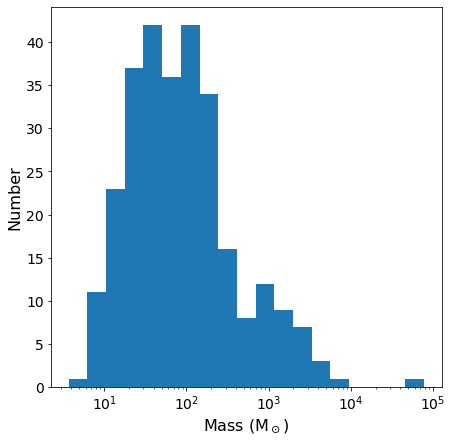

In [18]:
### Now lets try some plotting! 
### can you make a histogram of all the catalog leaf masses?

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
### this next line just constructs bins for the masses in logspace to make the plot nicer
bins = np.logspace(np.log10(min(catalog['mass'])),np.log10(max(catalog['mass'])),20)

ax.hist(masses, bins)
ax.set_xscale('log')
plt.xlabel('Mass (M$_\odot$)', fontsize = 16)
plt.ylabel('Number', fontsize = 16)

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.show()


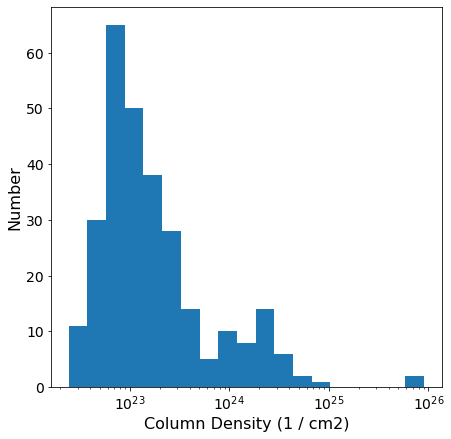

In [19]:
### can you do the same thing but for the column density? The key you'll need is called 'sma_column'
column_density = catalog['sma_column']
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
### this next line just constructs bins for the masses in logspace to make the plot nicer
bins = np.logspace(np.log10(min(catalog['sma_column'])),np.log10(max(catalog['sma_column'])),20)

ax.hist(column_density, bins)
ax.set_xscale('log')
plt.xlabel('Column Density (1 / cm2)', fontsize = 16)
plt.ylabel('Number', fontsize = 16)

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.show()

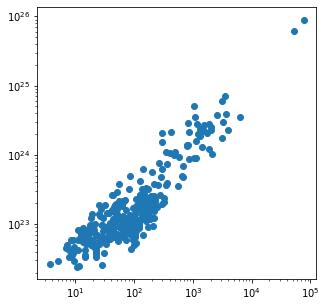

In [10]:
### how about making a scatter plot of mass vs column density

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.scatter(masses, column_density)
ax.set_xscale('log')
ax.set_yscale('log')

